In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

In [2]:
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Administrator\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Jun 20 21:31:51 2024).


In [4]:
df_exploded=df.explode("job_skills")

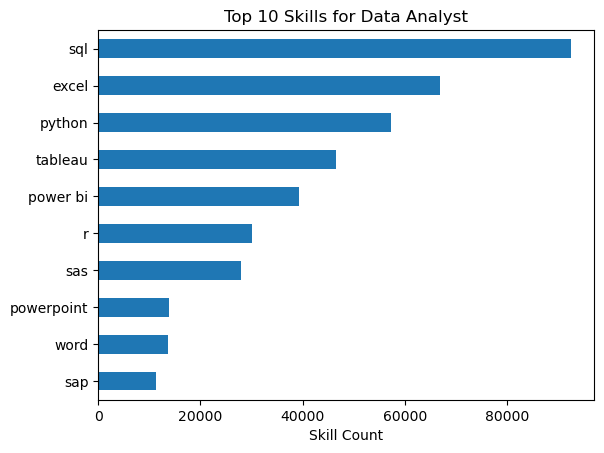

In [16]:
skills_count = df_exploded.groupby(["job_title_short","job_skills"]).size()
df_skills_count = skills_count.reset_index(name="skill_count").sort_values(by="skill_count",ascending=False)
job_title = "Data Analyst"
top_skills = 10
df_skills_final = df_skills_count[df_skills_count["job_title_short"]=="Data Analyst"].head(top_skills)
df_skills_final.plot(kind="barh",x="job_skills",y="skill_count")
plt.gca().invert_yaxis()
plt.title("Top 10 Skills for Data Analyst")
plt.xlabel("Skill Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()